In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
training_set=pd.read_csv("/content/twitter_training.csv", header = None ,names=['number' , 'source' , 'label' , 'message'])
validation_set=pd.read_csv("/content/twitter_validation.csv", header = None ,names=['number' , 'source' , 'label' , 'message'])
print(training_set.info())

from sklearn.impute import SimpleImputer
import numpy as np
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
new_massage_train=imp.fit_transform(np.array(training_set['message']).reshape(-1,1))
training_set['message']=new_massage_train.flatten()
from bs4 import BeautifulSoup
import re
import spacy
import emoji
!python -m spacy download en_core_web_sm

def remove_html(text):

    clean_text = BeautifulSoup(text , 'html.parser')

    return clean_text.get_text()

def clean_url(text):

    return re.sub(r'http\S+|www\S+', '', text)
def remove_punctuation(text):

    return re.sub(r'[^\w\s]', '', text)
nlp = spacy.load("en_core_web_sm")

def remove_stopwords(text):
    if not isinstance(text, str):  # Handle non-string inputs
        return text

    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop])
def remove_emojis(text):
    return emoji.demojize(text)
def lemmatize_text(text):

    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

def data_preprocessing(df):
    df['message'] = df['message'].str.lower()
    df['message'] = df['message'].apply(remove_html)
    print(df)
    df['message'] = df['message'].apply(clean_url)
    df['message'] = df['message'].apply(remove_punctuation)
    print(df)
    df['message'] = df['message'].apply(remove_stopwords)
    df['message'] = df['message'].apply(remove_emojis)
    print(df)
    df['message_lemmatized'] = df['message'].apply(lemmatize_text)
    return df


df_train=data_preprocessing(training_set)
df_test=data_preprocessing(validation_set)
df_train['label'] = df_train['label'].map({'Positive' : 1 ,  'Negative' : 0 ,'Neutral':2 , 'Irrelevant' : 2 })
df_train['label'].value_counts()
df_test['label'] = df_test['label'].map({'Positive' : 1 ,  'Negative' : 0 ,'Neutral':2 , 'Irrelevant' : 2 })
print(df_test['label'].value_counts())
x_train=df_train['message_lemmatized']
y_train=df_train['label']
x_test=df_test['message_lemmatized']
y_test=df_test['label']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60955 entries, 0 to 60954
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   number   60955 non-null  int64 
 1   source   60955 non-null  object
 2   label    60955 non-null  object
 3   message  60401 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB
None
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 120.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


<ipython-input-3-112b6261aa40>:21: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look like a filename, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  clean_text = BeautifulSoup(text , 'html.parser')


       number               source       label  \
0        2401          Borderlands    Positive   
1        2401          Borderlands    Positive   
2        2401          Borderlands    Positive   
3        2401          Borderlands    Positive   
4        2401          Borderlands    Positive   
...       ...                  ...         ...   
60950    4847  GrandTheftAuto(GTA)  Irrelevant   
60951    4847  GrandTheftAuto(GTA)  Irrelevant   
60952    4847  GrandTheftAuto(GTA)  Irrelevant   
60953    4847  GrandTheftAuto(GTA)  Irrelevant   
60954    4848  GrandTheftAuto(GTA)  Irrelevant   

                                                 message  
0      im getting on borderlands and i will murder yo...  
1      i am coming to the borders and i will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                          

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60955,)
(60955,)
(1000,)
(1000,)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
1905/1905 [==============================] - 1914s 983ms/step - loss: 0.7967 - accuracy: 0.6172 - val_loss: 0.6818 - val_accuracy: 0.7430 - lr: 1.9990e-05
Epoch 2/4
1905/1905 [==============================] - 1874s 984ms/step - loss: 0.4769 - accuracy: 0.7990 - val_loss: 0.5091 - val_accuracy: 0.8230 - lr: 1.7779e-05
Epoch 3/4
1905/1905 [==============================] - 1875s 984ms/step - loss: 0.2427 - accuracy: 0.9006 - val_loss: 0.4837 - val_accuracy: 0.8560 - lr: 1.5557e-05
Epoch 4/4
32/32 [==============================] - 6s 176ms/step - loss: 0.4837 - accuracy: 0.8560
Loss: 0.4837, Accuracy: 0.8560
32/32 [==============================] - 9s 175ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       266
           1       0.92      0.79      0.85       277
           2       0.83      0.90      0.87       457

    accuracy                           0.86      1000
   macro avg       0.86  

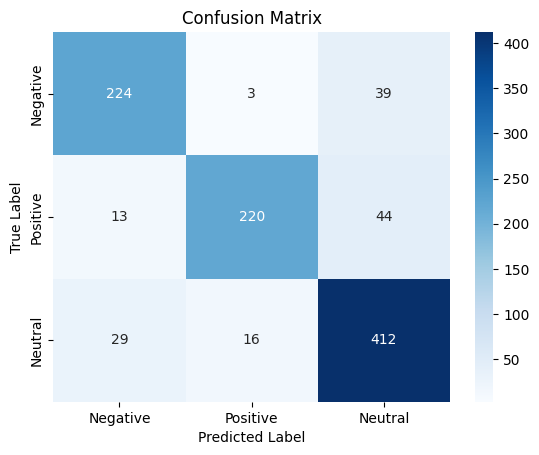

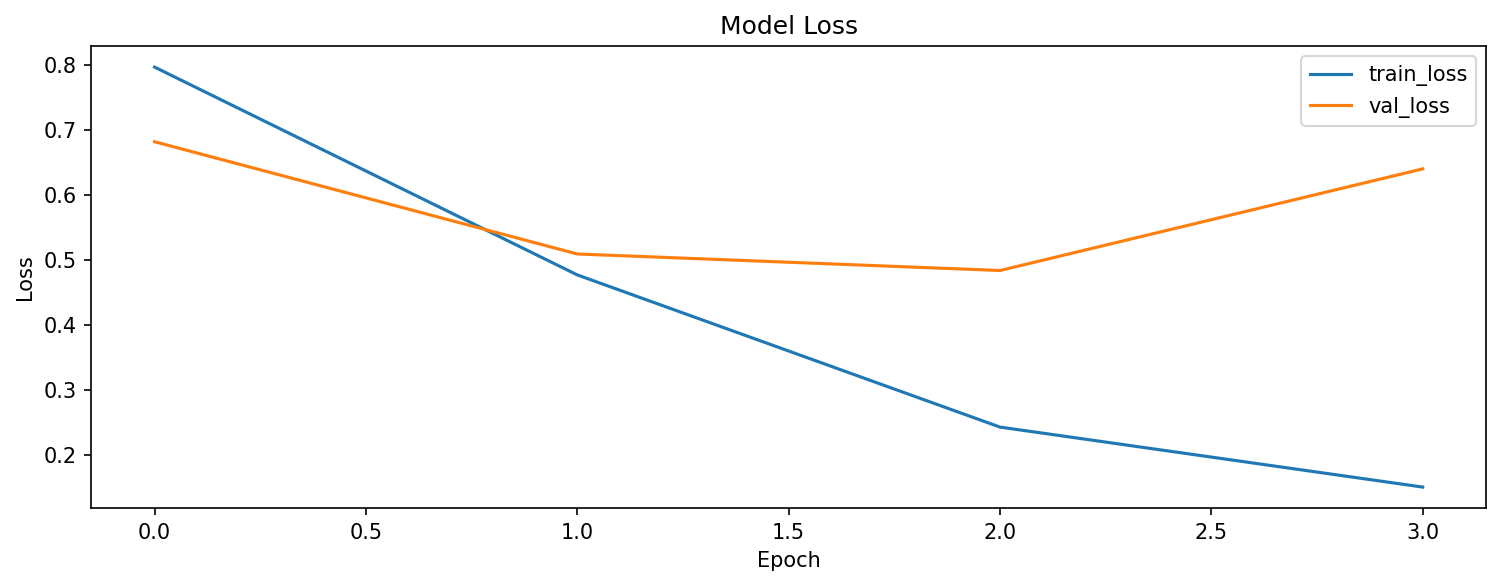

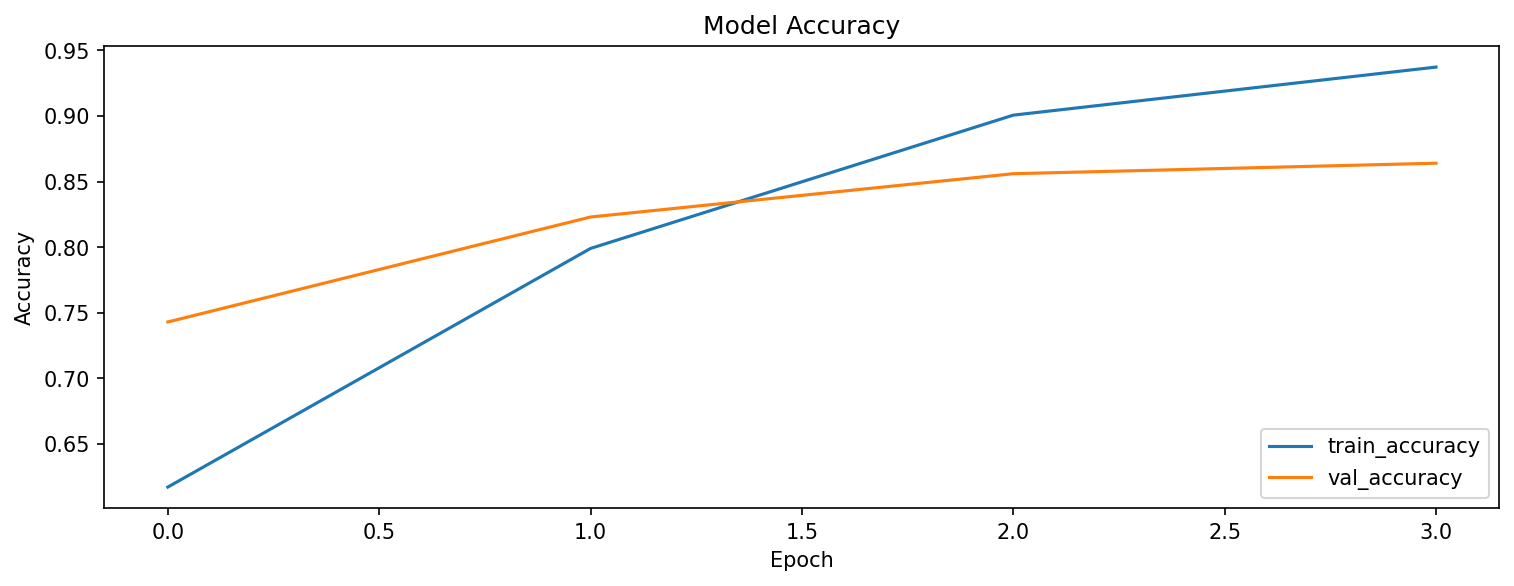

In [5]:
import tensorflow as tf # Import tensorflow right after installation to make it the default framework
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ... rest of the code ...

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=3)
# ... rest of the code ...

# 3.convert text to BERT Inputs
def encode_bert(texts, labels, max_len=161):
    encodings = tokenizer(
        texts.tolist(),
        truncation=True,
        padding=True,
        max_length=max_len,
        return_tensors="tf"
    )
    dataset = tf.data.Dataset.from_tensor_slices((
        dict(encodings),
        labels
    ))
    return dataset

# 4. prepare datasets
train_dataset = encode_bert(x_train, y_train).shuffle(1000).batch(32)
val_dataset = encode_bert(x_test, y_test).batch(32)

# 5. Compile model
#optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

from transformers import create_optimizer

steps_per_epoch = len(train_dataset)
num_train_steps = steps_per_epoch * 10
num_warmup_steps = int(0.1 * num_train_steps)

optimizer, schedule = create_optimizer(
    init_lr=2e-5,
    num_warmup_steps=num_warmup_steps,
    num_train_steps=num_train_steps
)

model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

# 6. Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))


# 7. Training
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=4,
    callbacks=[early_stopping, reduce_lr], class_weight=class_weights
)

# 8. Evaluation
loss, accuracy = model.evaluate(val_dataset)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# 9. Prediction and metrics
y_probs = model.predict(val_dataset).logits
y_pred = np.argmax(y_probs, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 10. Accuracy and Loss Plot
plt.figure(figsize=(12, 4), dpi=150)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(12, 4), dpi=150)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


<ipython-input-8-9fdb0f4b2596>:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2024-01-01", "2024-04-01", freq="H"), size=len(y_test)


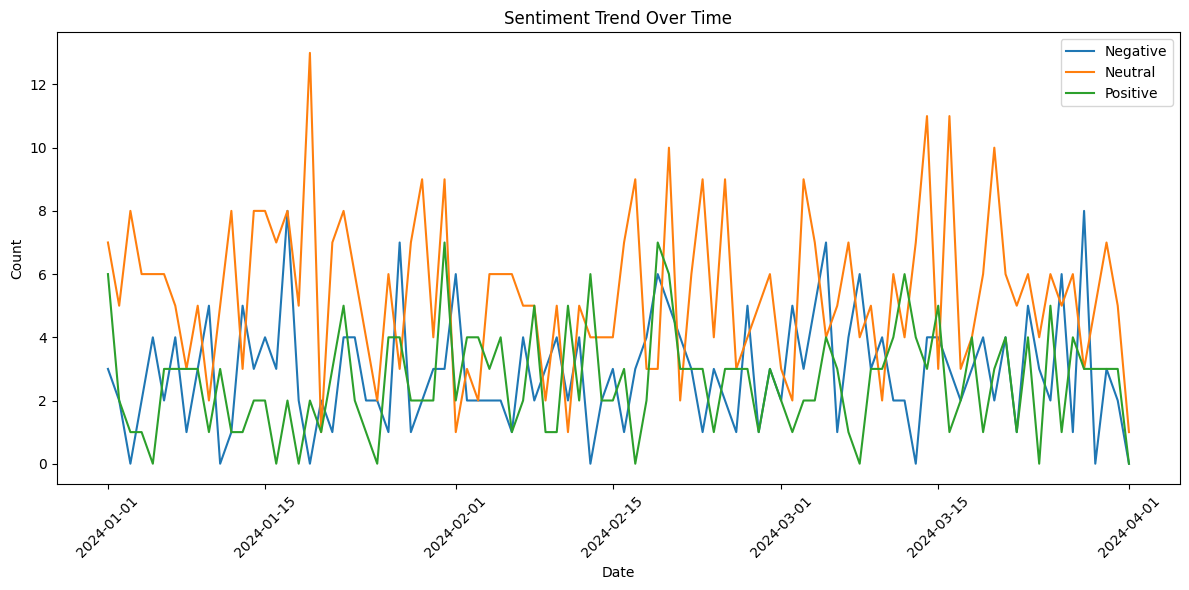

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# Assuming you have already run the model and have y_test, y_pred

# ... (your previous code) ...

# Generate random timestamps for demonstration purposes
timestamp_list = pd.to_datetime(
    np.random.choice(
        pd.date_range("2024-01-01", "2024-04-01", freq="H"), size=len(y_test)
    )
)

# Create the DataFrame with x_test instead of val_dataset
df = pd.DataFrame(
    {
        "text": x_test,  # Use x_test which contains the text data
        "true_label": y_test,
        "predicted_label": y_pred,
        "timestamp": pd.to_datetime(timestamp_list),  # Ensure datetime format
    }
)

# Map numeric labels to sentiment names if needed
label_map = {0: "Negative", 1: "Positive", 2: "Neutral"}
df["sentiment"] = df["predicted_label"].map(label_map)

# Group by day
daily_sentiment = (
    df.groupby([df["timestamp"].dt.date, "sentiment"]).size().unstack(fill_value=0)
)

# Create and display the plot
plt.figure(figsize=(12, 6))
for sentiment in daily_sentiment.columns:
    plt.plot(daily_sentiment.index, daily_sentiment[sentiment], label=sentiment)

plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:


from transformers import BertTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def preprocess_text(texts, tokenizer, max_len=128):  # Added max_len
    """
    Preprocess new incoming text data.

    Args:
        texts (list of str): List of raw text inputs.
        tokenizer (Tokenizer): Pre-trained tokenizer.
        max_len (int): Maximum sequence length.

    Returns:
        np.array: Padded sequences ready for prediction.
    """
    # Tokenize the texts using BertTokenizer
    encodings = tokenizer(
        texts,
        add_special_tokens=True,
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='tf'
    )

    # Extract the input IDs (tokenized sequences)
    input_ids = encodings['input_ids'].numpy()

    return input_ids

In [12]:
import emoji
import spacy
def remove_html(text):

    clean_text = BeautifulSoup(text , 'html.parser')

    return clean_text.get_text()

def clean_url(text):

    return re.sub(r'http\S+|www\S+', '', text)
def remove_punctuation(text):

    return re.sub(r'[^\w\s]', '', text)
nlp = spacy.load("en_core_web_sm")

def remove_stopwords(text):
    if not isinstance(text, str):
        return text

    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop])
def remove_emojis(text):
    return emoji.demojize(text)
def lemmatize_text(text):

    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

def clean_text(text):
    if not isinstance(text, str):
        return text

    text = text.lower()
    text = remove_html(text)
    text = clean_url(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_emojis(text)
    text = lemmatize_text(text)

    return text

In [17]:
def Predict(text, model, tokenizer):

    text = [text]
    text = clean_text(text)
    text_padded = preprocess_text(text, tokenizer)

    y_prob = model.predict(text_padded)

    # Fix: Change axis to 0 or remove it completely
    y_pred = np.argmax(y_prob.logits, axis=-1)  # Use logits and axis=-1


    classes = ['Negative', 'Positive', 'Neutral']

    pred_class = classes[y_pred[0]]  # Get predicted class label
    pred_prob = y_prob.logits[0][y_pred[0]]  # get predicted prob, access with logits


    return pred_class, pred_prob

In [7]:
# loading the tokenizer
import pickle
import tensorflow as tf # Import TensorFlow before using it

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)


from transformers import TFBertForSequenceClassification # Import the necessary class
loaded_model = TFBertForSequenceClassification.from_pretrained('/content/bert_model') # Assuming '/content/bert_model' is the directory where your model is saved

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [21]:
new_text = "The product arrived on time and was packaged as expected."

pred_class  , prob  = Predict(new_text , loaded_model , tokenizer)

print(f"Class Prediction is : {pred_class} with Probabilty {prob}")

1/1 [==============================] - 2s 2s/step
Class Prediction is : Neutral with Probabilty 3.3444747924804688
